# Exercise 1: Model of a neuron and the learning process

## 1.1 Model of a neuron

Write a Python function, which calculates the output of a neuron. Assume a model of a neuron shown in Figure 1 with three inputs and a threshold. The threshold can be interpreted as an additional input with fixed input of $-1$ and weight $w_{10}$. The output of the function has to correspond to output of the neuron.

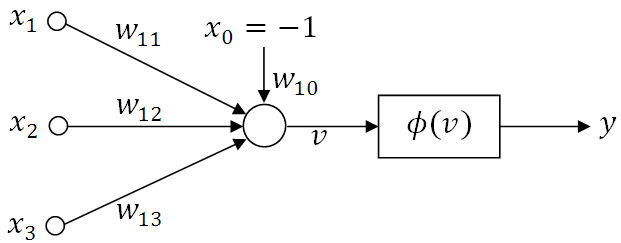

Figure 1. Model of a neuron

Use the scalar product of input vector $[x_0 x_1 x_2 x_3]$ and weights $[x_0 x_1 x_2 x_3]$ in order to calculate the neuron activation. The function has to have an additional input, which is used to select different nonlinear activation functions. The function should support the following nonlinear functions:

1. Step function
2. Piecewise linear function (ramp)
3. Sigmoid function defined as $\phi = \frac{1}{1+\exp (-av)}$, with $a=1$

**Tasks**

1. Write the code for calculating the aforementioned nonlinear functions and for the function which calculates the output of a neuron.

In [2]:
import numpy as np

def step_function(x):
    #pass # Write your code here
    return 1 if x > 0 else 0
    

def ramp_function(x):
    #pass # Write your code here
    return np.maximum(0, x)

def sigmoid_function(x, a=1):
    #pass # Write your code here
    return 1 / (1 + np.exp(-a*x))

def neuron(x, w, activation):
    #pass # Write your code here
    z = np.dot(w, x)
    return activation(z)


**Tasks**

1. Pick a random weight vector $\mathbf{w}$. Write down the chosen weights and print the neuron response for following inputs (for each activation function):

$x_1 = [0.5, 1, 0.7]^T$

$x_2 = [0, 0.8, 0.2]^T$


In [6]:
# Write your code here
from matplotlib.pylab import normal
w = normal(0,1,size=(4))

print(w)

x1 = np.array([-1, 0.5, 1, 0.7])
x2 = np.array([-1, 0, 0.8, 0.2])

xs = [x1, x2]

for i, x in enumerate(xs):
    print(f"For X{i+1}")
    print(f"Step:\t{neuron(x, w, step_function)}\nRamp:\t{neuron(x,w,ramp_function)}\nSigm.:\t{neuron(x,w,sigmoid_function)}")
    print("---------------------------------")

[ 0.96314326  0.82073518 -0.39463357  2.48573829]
For X1
Step:	1
Ramp:	0.7926075661868202
Sigm.:	0.6883909511975774
---------------------------------
For X2
Step:	0
Ramp:	0.0
Sigm.:	0.3139530840878507
---------------------------------


## 1.2 Three neuron network

Write a function for a three neuron network (Figure 2) using the function developed in section 1.1.. Assume that neurons use the sigmoid transfer function, where $a=1$ and assume the weights are given as follows:

$w_1=[1, 0.5, 1, -0.4]$

$w_2=[0.5, 0.6, -1.5, -0.7]$

$w_3=[-0.5, -1.5, 0.6]$

*Remark*: The first element of the weight vector is the threshold of a neuron and is shown as $w_{i0}$ in Figure 2.

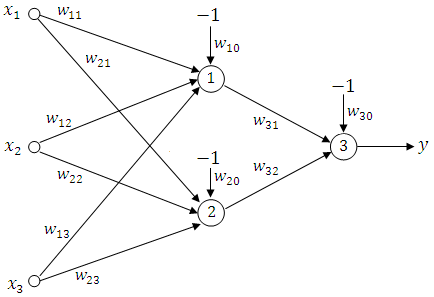

Figure 2. Three neuron network



**Tasks**

1. Write the code for calculating the output of the network shown in Fig. 2.

In [7]:
def three_neuron_network(x):
    #pass # Write your code here
    x_usable = np.insert(x, 0, -1)
    w1 = np.array([1, .5, 1, -.4])
    w2 = np.array([.5, .6, -1.5, -.7])
    w3 = np.array([-.5, -1.5, .6])
    
    z1 = neuron(x_usable, w1, sigmoid_function)
    z2 = neuron(x_usable, w2, sigmoid_function)
    
    zLast = np.array([-1, z1, z2])

    return neuron(zLast, w3, sigmoid_function)

print(f"Result of the network for x=[0.3, 0.7, 0.9]: {three_neuron_network(np.array([0.3, 0.7, 0.9]))}")

Result of the network for x=[0.3, 0.7, 0.9]: 0.5021828523608841


**Tasks**

1. Print the output of the network for input given as $x=[0.3, 0.7, 0.9]^T$.
2. Does the output of the network depend on neuron weights?

## 1.3 Delta rule

The goal of this experiment is to better understand the learning process. In this experiment we will implement a logical AND function using one neuron with two inputs and a threshold (see Figure 3). We will use the sigmoid nonlinear activation function with $a=1$.

For the learning phase, we have to define the following input output pairs $x_i$, $y_i$ for the logical AND function: for inputs $x_1=[-1, 0, 0]^T$, $x_2=[-1, 0, 1]^T$, and $x_3=[-1, 1, 0]^T$ the output $y$ should be equal to $0$; for input vector $x_4=[-1, 1, 1]^T$ the output value $y$ should be equal to $1$. The first component of all input vectors has value $-1$ and defines the neuron threshold visible as $w_{10}$ in Fig. 3. At the beginning we set the neuron weights to random values. We use the delta rule in order to update the weights:

$$\Delta w_{kj}=\eta e_{k}(n)x_{j}(n)$$

where

$$e_{k}(n)=d_{k}(n)-y_{k}(n)$$

where $d_{k}(n)$ is the expected neuron output and $y_{k}(n)$ is the obtained neuron output. This iterative procedure is repeated until the error is sufficiently small.

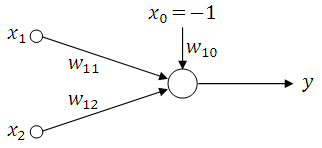

Figure 3. One neuron network

**Tasks**

1. Write the code which iteratively calculates the output of the network and uses the delta rule to update the weights until the error is sufficiently small. Experiment with different starting weights and different learning rates. (In case of instabilities, perform the experiment using a small learning rate, for example $\eta =0.05$). Show the error function ($y$-axis) and number of iterations ($x$-axis) for different learning rates.

    - What is the best learning rate? How does the learning rate affect the neural network?
    - How did you define the sufficiently small error used to terminate the algorithm?
    - After how many iterations does the algorithm terminate?


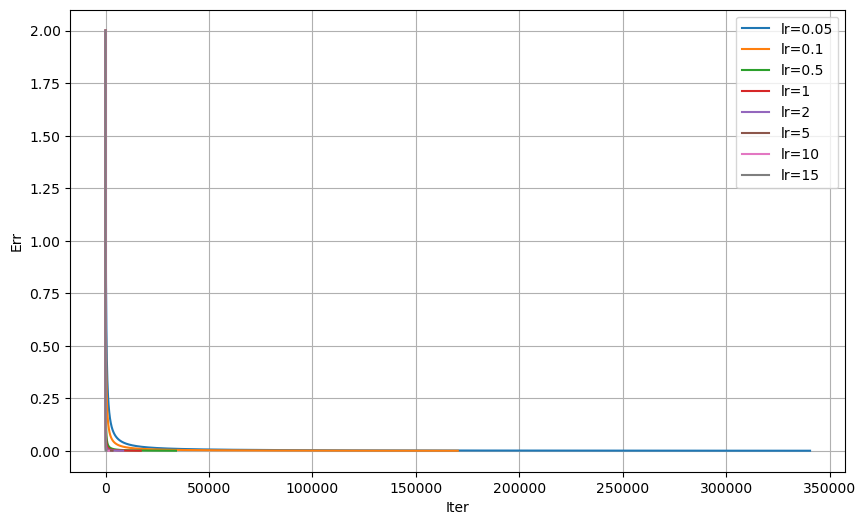

LR: 0.05, Iter: 340560, Final err: 0.0009999939897350108
LR: 0.1, Iter: 170280, Final err: 0.0009999823663939642
LR: 0.5, Iter: 34060, Final err: 0.0009997715612073792
LR: 1, Iter: 17030, Final err: 0.000999654465840297
LR: 2, Iter: 8510, Final err: 0.0009996276729919667
LR: 5, Iter: 3400, Final err: 0.0009978334553152235
LR: 10, Iter: 1620, Final err: 0.0009991004745573567
LR: 15, Iter: 450, Final err: 0.0009951823746127018


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x1 = [-1, 0, 0]
x2 = [-1, 0, 1]
x3 = [-1, 1, 0]
x4 = [-1, 1, 1]
lr = [0.05, 0.1, 0.5, 1, 2, 5, 10, 15]
errs = []
iters = []
err = 1e-3

for idx, rate in enumerate(lr):
    w0 = np.array([0.0, 0.0, 0.0])
    X = np.array([x1, x2, x3, x4])
    Y = np.array([0, 0, 0, 1])
    i = 0
    err_ = []
    iterr = []
    
    while True:
        y_pred = [sigmoid_function(x @ w0) for x in X]
        error = np.array(Y) - y_pred
        
        if i % 10 == 0:
            err_.append(np.sum(np.abs(error)))
            iterr.append(i)
        
        if len(err_) > 0 and err_[-1] < err:
            err_.append(np.sum(np.abs(error)))
            iterr.append(i)
            break
        
        for j in range(len(Y)):
            for k in range(len(X[0])):
                w0[k] += rate * error[j] * X[j][k]
        i += 1
        
    errs.append(err_)
    iters.append(iterr)

# Single plot with all learning rates
plt.figure(figsize=(10, 6))
plt.plot(iters[0], errs[0], label="lr=0.05")
plt.plot(iters[1], errs[1], label="lr=0.1")
plt.plot(iters[2], errs[2], label="lr=0.5")
plt.plot(iters[3], errs[3], label="lr=1")
plt.plot(iters[4], errs[4], label="lr=2")
plt.plot(iters[5], errs[5], label="lr=5")
plt.plot(iters[6], errs[6], label="lr=10")
plt.plot(iters[7], errs[7], label="lr=15")
plt.xlabel("Iter")
plt.ylabel("Err")
plt.legend()
plt.grid()
plt.show()

for idx, rate in enumerate(lr):
    print(f"LR: {rate}, Iter: {iters[idx][-1]}, Final err: {errs[idx][-1]}")
    
    
# The best learning rate is 15 with 450 iterations and final error of 0.0009951823746127018
# LR dictates how volatile the weight updates are.
# I produced an error that is less than 0.001 as I felt that was a good enough threshold for convergence.
# Because the stopping error is relatively big (0.001) the bigger learning rates perform better as they converge faster.
# Initial weights also had a big role in convergence speed and final error.
# For zero-weights we refer to following LR, ITER table:
# LR: 0.05, Iter: 340560
# LR: 0.1, Iter: 170280
# LR: 0.5, Iter: 34060
# LR: 1, Iter: 17030
# LR: 2, Iter: 8510
# LR: 5, Iter: 3400
# LR: 10, Iter: 1620
# LR: 15, Iter: 450
# As shown for this specific error threshold and inital weights, the best learning rate is 15 possibly even higher.

# Exercise 2: Associative memory

## 2.1 Forming the correlation matrix directly

In this part of the exercise we will use the direct approach in forming the correlation matrix. Memory based on the correlation matrix should memorize input-output association pairs represented as vectors. For each input vector (key) the memory has to memorize the output pattern i.e. vector in an ASCII code formulation. In this example we will use 4-dimensional input and output vectors. Words (output vectos) that have to be memorized are: '*vrat*' , '*kraj*' , '*cres*' , '*otac*'. Vectors $b_i$, which represent those words should be formed as follows:

In [49]:
real=lambda x: np.array([[ord(character) for character in x]]).T

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

### 2.1.1 Orthogonal input vectors

This experiment demonstrates how to create an associative memory. Ortonormalized set of vectors defined as below

In [50]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

is used as input vector set (set of keys). We form the memory correlation matrix $\mathbf{M}$ using input output pairs as follows:

In [ ]:
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]
b1: [[118 114  97 116]]
b2: [[107 114  97 106]]
b3: [[ 99 114 101 115]]
b4: [[111 116  97  99]]


In order to verify whether the memory is functioning properly, we have to calculate outputs for each input vector. For example, the output for the key $a_1$ can be obtained as follows:

In [53]:
char=lambda x:"".join(map(chr, map(int, list(x))))

word=char(M@a1)
print(word)

vrat


/tmp/ipykernel_43532/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


**Tasks**

For each key, print the key and the corresponding output.
1. Were all input-output pairs memorized correctly?
2. How many input-output pairs would be memorized if vectors $a_i$ were not normalized?

In [ ]:
# Write your code here
print(f"Key: \n{a2.T},\tValue: {char(M@a2)}\n----------------")
print(f"Key: \n{a3.T},\tValue: {char(M@a3)}\n----------------")
print(f"Key: \n{a4.T},\tValue: {char(M@a4)}\n----------------")

# Yes all values are correctly retrieved.

# If we didn't normalize the key vectors the retrieval would still somewhat work but initial values would be scaled and key vectors would still have to at least be orthogonal.
# We would still be able to memorize 4 input-output pairs.

Key: 
[[0 1 0 0]],	Value: kraj
----------------
Key: 
[[0 0 1 0]],	Value: cres
----------------
Key: 
[[0 0 0 1]],	Value: otac
----------------


/tmp/ipykernel_43532/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.2 Correlation matrix properties

The goal of this experiment is to demonstrate the capacity of obtained memory. In this part of the exercise we will try to memorize one more (fifth) word ('*mrak*'). In 4-dimensional vector space the maximum number of linearly independent vectors is four. Because of this fact, we pick an arbitrary unit vector as the fifth key, for example:

In [61]:
a5 = (a1 + a3) / np.sqrt(2)

Form vectors $b_5$ ('*mrak*') and $a_5$ as explained and add them into the memory using the following expression:

In [62]:
b5 = real("mrak")
M_five = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T + b5 * a5.T

**Tasks**

Once again, print each key and the corresponding output.
1. Was the new association properly memorized?
2. Did other associations stay correctly memorized?
    - If not - which were not memorized correctly and why?
    - If yes - which were memorized correctly and why?

In [64]:
# Write your code here
print(f"Key: \n{a1.T},\tValue: {char(M@a1)}\n----------------")
print(f"Key: \n{a2.T},\tValue: {char(M@a2)}\n----------------")
print(f"Key: \n{a3.T},\tValue: {char(M@a3)}\n----------------")
print(f"Key: \n{a4.T},\tValue: {char(M@a4)}\n----------------")
print(f"Key: \n{a5.T},\tValue: {char(M@a5)}\n----------------")

# All old values are correctly retrieved. It is because we haven't changed their keys.
# The new value is wrong because a5 is not orthogonal to a1 and a3.
# The cross-talk from a1 and a3 distorts the retrieval of b5 while b1 and b3 are correctly retrieved.

Key: 
[[1 0 0 0]],	Value: vrat
----------------
Key: 
[[0 1 0 0]],	Value: kraj
----------------
Key: 
[[0 0 1 0]],	Value: cres
----------------
Key: 
[[0 0 0 1]],	Value: otac
----------------
Key: 
[[0.70710678 0.         0.70710678 0.        ]],	Value: ¡£
----------------


/tmp/ipykernel_43532/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.3 Word pairs as associations

In this experiment we will form the associative memory, which memorizes word pairs. The associations, which have to be memorized are: *ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*. Generate input vectors (keys) as follows:

In [67]:
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[47791 47867 46818 44624]
 [50264 50354 49352 47048]
 [43019 43124 42263 40271]
 [47892 48130 47019 44766]]


**Tasks**

1. What is the response for each input key?
2. Which associations were memorized correctly?
3. Which associations were not memorized correctly and why?
4. How can we fix this problem?

In [ ]:
# Write your code here
def findPair(key_vector, M):
    value_vector = np.zeros((4, 1))
    for i in range(len(M)):
        for j in range(len(M[0])):
            value_vector[i] = M[i, j] / key_vector[j]
    return char(value_vector)

print(f"Key: \n{a1.T} aka {char(a1)},\tValue: {findPair(a1, M)}\n----------------")
print(f"Key: \n{a2.T} aka {char(a2)},\tValue: {findPair(a2, M)}\n----------------")
print(f"Key: \n{a3.T} aka {char(a3)},\tValue: {findPair(a3, M)}\n----------------")
print(f"Key: \n{a4.T} aka {char(a4)},\tValue: {findPair(a4, M)}\n----------------")

# All values are tangled and incorrect. This is because the key vectors are not orthogonal and thus cross-talk distorts the retrieval of values
# Key: 
# [[114 117 107  97]] aka ruka,	Value: ǌǥƟǍ
# ----------------
# Key: 
# [[107 115 101 116]] aka kset,	Value: ƀƕśƁ
# ----------------
# Key: 
# [[109 111 114 101]] aka more,	Value: ƹǑƎƻ
# ----------------
# Key: 
# [[109  97 109  97]] aka mama,	Value: ǌǥƟǍ
#
# There are few fixes to this demise. Either we can orthogonalize the key vectors via Gram-Schmidt process or we can choose orthonormal vectors.

Key: 
[[114 117 107  97]] aka ruka,	Value: ǌǥƟǍ
----------------
Key: 
[[107 115 101 116]] aka kset,	Value: ƀƕśƁ
----------------
Key: 
[[109 111 114 101]] aka more,	Value: ƹǑƎƻ
----------------
Key: 
[[109  97 109  97]] aka mama,	Value: ǌǥƟǍ
----------------


/tmp/ipykernel_43532/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.4 Input vector orthogonalization

In this experiment we show an associative memory, which uses keys that are orthonormalized. We use the Gram-Schmidt orthogonalization method as follows. We first form the matrix $\mathbf{A}$ using vectors $a_i$:

In [82]:
A=np.hstack([a1, a2, a3, a4])

After this step we perform the orthonormalization step:

In [84]:
from scipy.linalg import orth
C=orth(A.T)

We extract individual orthonormal vectors $c_i$:

In [85]:
c1=np.array([C[0]]).T
c2=np.array([C[1]]).T
c3=np.array([C[2]]).T
c4=np.array([C[3]]).T

In the next step we form a new matrix $\mathbf{M}$ using vectors $c_i$ instead of vectors $a_i$ when creating the matrix $\mathbf{M}$.

In [86]:
M = b1 * c1.T + b2 * c2.T + b3 * c3.T + b4 * c4.T

**Tasks**

Verify the responses of matrix $\mathbf{M}$ with vectors $c_i$ as inputs.
1. What is the effect of vector orthonormalization?
2. How many pairs were correctly memorized?
3. What can we expect when normalizing the vectors?
4. What can we expect when only orthogonalizing the vectors?
5. What can we expect if vectors $c_i$ are linearly independent but not orthogonal?

In [88]:
# Write your code here
print(f"Key: \n{c1.T} aka {char(a1)},\tValue: {char(M@c1)}\n----------------")
print(f"Key: \n{c2.T} aka {char(a2)},\tValue: {char(M@c2)}\n----------------")
print(f"Key: \n{c3.T} aka {char(a3)},\tValue: {char(M@c3)}\n----------------")
print(f"Key: \n{c4.T} aka {char(a4)},\tValue: {char(M@c4)}\n----------------")

# 1. The effect of orthogonalizing the key vectors is that now all values are correctly retrieved
# because there is no cross-talk between the key vectors.
# 2. No pairs were memorized in the process as key vectors were all ortonormalized. But such can be avoided with
# either second memory where this orthonormalized key would point to appropriate pair or with a dictionary.
# 3. We expect to lose initial information from key vectors.
# 4. We can expect scaled values.
# 5. Incorrect or mixed retrievals would can be expected if key vectors are linearly independent but not orthogonal. This case is still better than linearly dependent key vectors.



Key: 
[[-0.50594743  0.14847022  0.77925491  0.33872641]] aka ruka,	Value: vrat
----------------
Key: 
[[-0.50939047 -0.83525837 -0.19795538  0.06065043]] aka kset,	Value: kraj
----------------
Key: 
[[-0.50546797  0.25257838 -0.01775974 -0.8248581 ]] aka more,	Value: cres
----------------
Key: 
[[-0.47858195  0.46530012 -0.59435684  0.44854773]] aka mama,	Value: otac
----------------


/tmp/ipykernel_43532/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.5 Finding the correlation matrix using matrix inversion

For previously used word pairs (*ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*) find a $4\times 4$ correlation matrix $\mathbf{M}$ as $\mathbf{M} = \mathbf{B}\mathbf{A}^{-1}$, where matrix $\mathbf{B}$ is defined as:

In [92]:
B=np.hstack([b1, b2, b3, b4])
M=B@np.linalg.inv(A)

**Tasks**

1. Were all associations properly memorized? Remark: The result should be rounded to the nearest number before comparison.

In [ ]:
# Write your code here
print(f"Key: \n{a1.T} aka {char(a1)}\tValue: {char(np.round(M@a1))}\n----------------")
print(f"Key: \n{a2.T} aka {char(a2)}\tValue: {char(np.round(M@a2))}\n----------------")
print(f"Key: \n{a3.T} aka {char(a3)}\tValue: {char(np.round(M@a3))}\n----------------")
print(f"Key: \n{a4.T} aka {char(a4)}\tValue: {char(np.round(M@a4))}\n----------------")

# Yes all values are correctly retrieved.

Key: 
[[114 117 107  97]] aka ruka	Value: vrat
----------------
Key: 
[[107 115 101 116]] aka kset	Value: kraj
----------------
Key: 
[[109 111 114 101]] aka more	Value: cres
----------------
Key: 
[[109  97 109  97]] aka mama	Value: otac
----------------


/tmp/ipykernel_43532/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.6 Finding the correlation matrix using pseudo-inversion

A pseudo-inverse matrix can be used in order to find the correlation matrix when number of associations is larger than dimensionality of vectors representing the associations. In this case, the correlation matrix can be found as $\mathbf{M} = \mathbf{B}\mathbf{A}^{+}$, where $\mathbf{A}^{+}$ is a pseudo-inverse matrix defined as $\mathbf{A}^{+} = \mathbf{A}^{T}(\mathbf{A}\mathbf{A}^{T})^{-1}$.

Assume that the vectors $a_i$ and $b_i$ are defined previously (five associations in total). Find the pseudo-inverse matrix for this case.

In [104]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

a5 = (a1 + a3) / np.sqrt(2)

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
A_pseudo=A.T@np.linalg.inv(A@A.T)
M=B@A_pseudo

**Tasks**

1. Were all pairs memorized correctly?
2. If not, what is the error between expected and obtained values?

In [108]:
# Write your code here
print(f"Key: \n{a1.T}\tValue: {char(np.round(M@a1))}\n----------------")
print(f"Key: \n{a2.T}\tValue: {char(np.round(M@a2))}\n----------------")
print(f"Key: \n{a3.T}\tValue: {char(np.round(M@a3))}\n----------------")
print(f"Key: \n{a4.T}\tValue: {char(np.round(M@a4))}\n----------------")
print(f"Key: \n{a5.T}\tValue: {char(np.round(M@a5))}\n----------------")

print(f"Difference b1 - retrieved: {(b1 - np.round(M@a1)).T}")
print(f"Difference b2 - retrieved: {(b2 - np.round(M@a2)).T}")
print(f"Difference b3 - retrieved: {(b3 - np.round(M@a3)).T}")
print(f"Difference b4 - retrieved: {(b4 - np.round(M@a4)).T}")
print(f"Difference b5 - retrieved: {(b5 - np.round(M@a5)).T}")

# Some values are correctly retrieved while some are not.
# As expected b1, b3 and b5 are wrong because the matrix had to "adapt" with 4 orthogonal and 1 linearly dependent key vectors.

Key: 
[[1 0 0 0]]	Value: faR`
----------------
Key: 
[[0 1 0 0]]	Value: kraj
----------------
Key: 
[[0 0 1 0]]	Value: SaV_
----------------
Key: 
[[0 0 0 1]]	Value: otac
----------------
Key: 
[[0.70710678 0.         0.70710678 0.        ]]	Value: w
----------------
Difference b1 - retrieved: [[16. 17. 15. 20.]]
Difference b2 - retrieved: [[0. 0. 0. 0.]]
Difference b3 - retrieved: [[16. 17. 15. 20.]]
Difference b4 - retrieved: [[0. 0. 0. 0.]]
Difference b5 - retrieved: [[-22. -24. -22. -28.]]


/tmp/ipykernel_43532/3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


## 2.2 Finding the correlation matrix using supervised learning

This experiment shows us how to form the matrix $\mathbf{M}$ using supervised learning. In two following experiments we will use learning with error correction.

### 2.2.1 Learning with error correction

Form matrices $\mathbf{A}$ and $\mathbf{B}$ where each contains 4 vectors stacked in columns as explained in previous experiments. Check the contents of obtained matrices with following operations:

In [109]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

A=np.hstack([a1, a2, a3, a4])
B=np.hstack([b1, b2, b3, b4])

In order to start the learning procedure we have to initialize the matrix $\mathbf{M}$ (For example, random values uniformly generated in $[-0.5, 0.5]$ interval):

In [117]:
M=np.random.rand(4, 4)-0.5

For the learning part use the function *trainlms*, which is the implementation of the Widrow-Hoff LMS learning algorithm. The function can be used as follows:

In [116]:
def trainlms(A, B, M, ni, max_num_iter, min_err=0.02):
    d=B
    x=A
    w=M

    n=0
    err=[]
    while (n<max_num_iter):
        n+=1
        e=d-w@x
        w+=ni*np.dot(e, x.T)
        err.append(np.sum(np.sum(np.multiply(e, e))))
        if (err[-1]<min_err):
            break
    return w, err

where *max_num_iter* is the number of iterations and *ni* is the learning rate. Find the *max_num_iter* variable experimentally. For *ni* you can use:

In [118]:
ni=0.9999/np.linalg.eig(A @ A.T)[0].max()

The function trainlms performs the learning until SSE drops below $0.02$ or maximum number of iterations is performed. After the learning phase, look at the responses of the correlation matrix $\mathbf{M}$:

In [119]:
M, e=trainlms(A, B, M, ni, 100000)

If we type

In [120]:
np.round(M@A)==B

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

we will see, which characters were properly reconstructed: the positions with correct reconstructions will have value *True* and  other positions will have value *False*. By calling the *trainlms* multiple times we can extend the learning process and maybe increase the number of memorized characters but the proper way to extend the learning process is to increase the *max_num_iter* variable. We can draw a graph, which plots the error with number of iterations (in logaritmic scale) using the following commands:

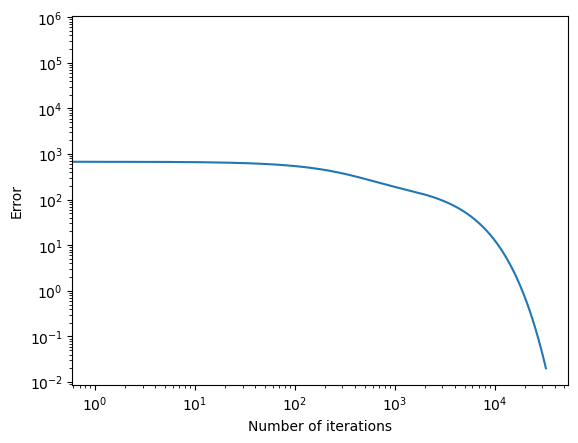

In [131]:
plt.plot(e)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

**Tasks**

1. Plot a graph showing number of memorized characters tied to number of used iterations. (Caution: When building the graph, start the simulation with the same starting matrix.)

[[-0.082978    0.22032449 -0.49988563 -0.19766743]
 [-0.35324411 -0.40766141 -0.31373979 -0.15443927]
 [-0.10323253  0.03881673 -0.08080549  0.1852195 ]
 [-0.29554775  0.37811744 -0.47261241  0.17046751]]
Iters: 10, Memorized: 1/16, Err: 664.139258603634
Iters: 50, Memorized: 1/16, Err: 606.8411926204442
Iters: 100, Memorized: 1/16, Err: 545.0161115861374
Iters: 500, Memorized: 1/16, Err: 285.8198388138327
Iters: 1000, Memorized: 3/16, Err: 190.52681977583237
Iters: 5000, Memorized: 7/16, Err: 53.76473240516519
Iters: 10000, Memorized: 11/16, Err: 12.877609787620315
Iters: 50000, Memorized: 16/16, Err: 0.019997293213081642
Iters: 100000, Memorized: 16/16, Err: 0.019997293213081642


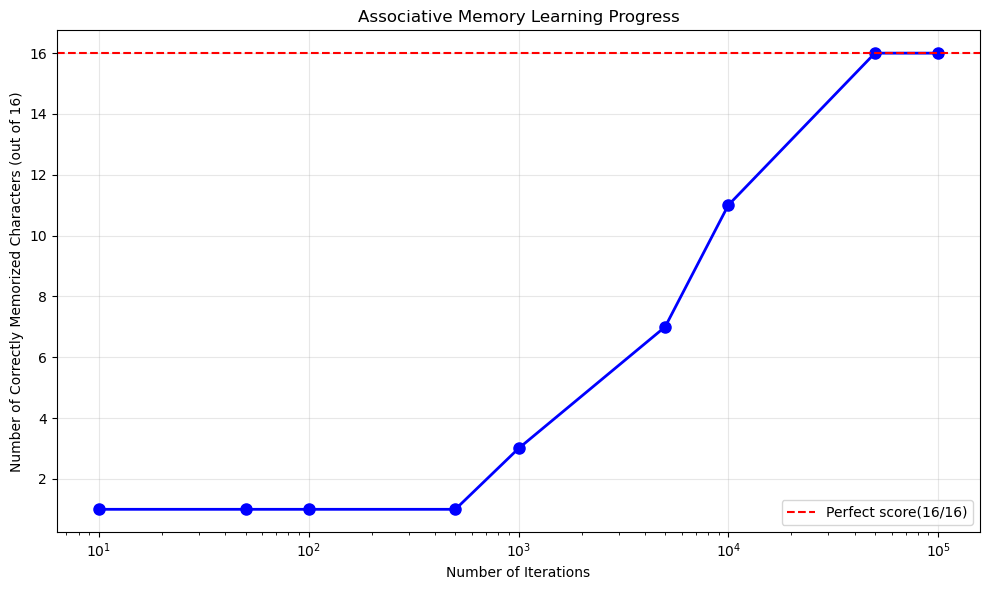

In [132]:
# Write your code here
np.random.seed(1)
M_init=np.random.rand(4, 4)-0.5
print(M_init)

iteration_counts = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
memorized_chars = []

for max_iter in iteration_counts:
    M = M_init.copy()
    
    M_trained, e = trainlms(A, B, M, ni, max_iter)
    
    result = np.round(M_trained @ A)
    true_char = np.sum(result == B)
    memorized_chars.append(true_char)
    
    print(f"Iters: {max_iter}, Memorized: {true_char}/16, Err: {e[-1]}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(iteration_counts, memorized_chars, 'bo-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Number of Iterations')
plt.ylabel('Number of Correctly Memorized Characters (out of 16)')
plt.title('Associative Memory Learning Progress')
plt.grid(True, alpha=0.3)
plt.axhline(y=16, color='r', linestyle='--', label='Perfect score(16/16)')
plt.legend()
plt.tight_layout()
plt.show()


## 2.2.2 Effect of larger number of associations

This experiment demonstrates the capacity of the associative memory. What is the capacity of a $4\times 4$ correlation matrix based associative memory?

**Tasks**
1. For additional pair '*auto*'-'*mrak*' create vectors $a_5$ and $b_5$ as explained in the previous part of the exercise. Create new matrices A and B with dimensions $4$ (rows) $\times$ $5$ (columns) in the same way as previously explained. Initialize the matrix $\mathbf{M}$ with random starting values.

In [135]:
# Write your code here
a5 = real("auto")
b5 = real("mrak")

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
M=np.random.rand(4, 4)-0.5

Use the *trainlms* function in the following way:

In [ ]:
ni=0.9999/max(np.linalg.eig(np.dot(A, A.T))[0])
M, e=trainlms(A, B, M, ni, 100000)
print(np.sum(np.round(np.dot(M, A))==B))
print(np.round(np.dot(M, A))==B)
print(e[-1])
# 1. 100000
# 2. 2
# 3. 219.8, SSE is network performance function. It measures performance according to the sum of squared errors.
# 4. I don't understand the question - on which function are you referring to?
# 5. ????????????
# 6. No. We can improve it but we would never be able to perfectly memorize all 5 pairs because 5 key vectors in 4D space cannot be orthogonal.
# 7. Because we cannot store 5 key vectors in 4D space without cross-talk.

2
[[False False False False False]
 [False  True False False False]
 [False  True False False False]
 [False False False False False]]
219.79844711685385


**Tasks**

1. How many iterations did you use?
2. How many characters were memorized correctly?
3. What is the SSE error?
4. What happens if we call the function from the beginning?
5. How many characters are correctly memorized now and how large is the mistake? Is there any difference and why?
6. Is it possible to train this network in order to memorize all five associations?
7. Why? (Explain the previous answer)